# Importing and processing data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.cifar10 import load_data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
X_train_small = X_train[:20000]
Y_train_small = Y_train[:20000]

In [ ]:
# data, label = X_train, Y_train
data, label = X_train_small, Y_train_small

n = int(0.8 * data.shape[0])

X_train = data[:n]
X_val = data[n:]

Y_train = label[:n]
Y_val = label[n:]

In [ ]:
X_train.shape

(16000, 32, 32, 3)

In [ ]:
i = 1
plt.imshow(f[i])

NameError: ignored

In [ ]:
final_image = np.zeros((330, 330, 3))
for c in range(10):
    class_images = X_train[Y_train.argmax(axis=-1) == c]
    for i in range(10):
        final_image[c * 33:c * 33 + 32, i * 33:i * 33 + 32, :] = class_images[i]

plt.imshow(final_image)

# CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4

input size = (32, 32, 3)
filters count = 8
kernel size = (3, 3)

weights = 3 * 3 * 3 * 8 = 216
biases = 8

params = 216 + 8 = 224


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=60,
                    validation_data=(X_val, Y_val))

Epoch 1/60
500/500 [==============================] - 33s 5ms/step - loss: 2.0194 - acc: 0.2501 - val_loss: 1.8336 - val_acc: 0.3133
Epoch 2/60
500/500 [==============================] - 2s 5ms/step - loss: 1.7467 - acc: 0.3544 - val_loss: 1.6375 - val_acc: 0.3952
Epoch 3/60
500/500 [==============================] - 2s 5ms/step - loss: 1.6250 - acc: 0.4031 - val_loss: 1.5165 - val_acc: 0.4495
Epoch 4/60
500/500 [==============================] - 2s 5ms/step - loss: 1.5562 - acc: 0.4306 - val_loss: 1.5871 - val_acc: 0.4372
Epoch 5/60
500/500 [==============================] - 2s 5ms/step - loss: 1.4965 - acc: 0.4539 - val_loss: 1.4029 - val_acc: 0.4933
Epoch 6/60
500/500 [==============================] - 2s 5ms/step - loss: 1.4513 - acc: 0.4702 - val_loss: 1.3792 - val_acc: 0.5027
Epoch 7/60
500/500 [==============================] - 2s 5ms/step - loss: 1.4299 - acc: 0.4784 - val_loss: 1.3569 - val_acc: 0.5123
Epoch 8/60
500/500 [==============================] - 3s 5ms/step - loss: 1

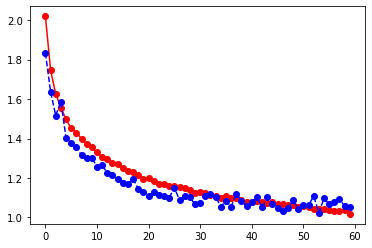

In [ ]:
plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

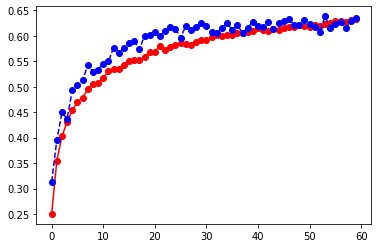

In [ ]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

# VGG net

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_val, Y_val))

Epoch 1/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0658 - acc: 0.7100 - val_loss: 1.1587 - val_acc: 0.6852
Epoch 2/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0652 - acc: 0.7120 - val_loss: 1.1276 - val_acc: 0.6985
Epoch 3/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0481 - acc: 0.7262 - val_loss: 1.1373 - val_acc: 0.7005
Epoch 4/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0396 - acc: 0.7284 - val_loss: 1.0911 - val_acc: 0.7140
Epoch 5/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0344 - acc: 0.7332 - val_loss: 1.1671 - val_acc: 0.6890
Epoch 6/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0198 - acc: 0.7371 - val_loss: 1.1524 - val_acc: 0.6970
Epoch 7/20
500/500 [==============================] - 3s 6ms/step - loss: 1.0160 - acc: 0.7376 - val_loss: 1.1886 - val_acc: 0.6890
Epoch 8/20
500/500 [==============================] - 3s 6ms/step - loss: 1.

In [ ]:
plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

In [ ]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1220 - acc: 0.7246


[1.1219911575317383, 0.7246000170707703]

In [ ]:
model.evaluate(X_val, Y_val)

125/125 [==============================] - 0s 3ms/step - loss: 1.1379 - acc: 0.7220


[1.1378703117370605, 0.722000002861023]